#Etude des statistiques du gagnant du ballon d'or de football depuis 2003

Le but de l'étude est de comparer les statistiques de chaque gagnant du ballon d'or depuis 2003 (titre qui récompense le meilleur footballeur de l'année), pour essayer de voir quels types de statistiques semblent les plus importantes pour remporter ce titre (à noter que cela peut être subjectif car il s'agit d'un vote de journalistes, provenant de tous les pays du monde). J'ai pour cela longuement récolté des informations sur chaque gagnant du ballon d'or depuis 2003 (année de ma naissance) pour les analyser. Etant donné que Lionel Messi et Cristiano Ronaldo ont marché sur le monde du football durant ces 15 dernières années, il est aussi intéressant de voir si leurs statistiques sont réellement au-dessus de celles des autres joueurs qui ont, eux aussi, été sacrés meilleur joueur de leur année respective...

In [1]:
import pandas as pd
df=pd.read_csv("ballon_or.csv", encoding='unicode_escape', sep=';')

In [2]:
df.head()

,Annee,Ballon d'or,Nationalite,Club,Poste,Numero sur le terrain,Nombre de trophees durant la saison,Nombre de buts,Nombre de passes decisives,Nombre de points pour le ballon d'or,Ligue des champions
0,2022,Karim Benzema,France,Real Madrid,Attaquant,9.0,4.0,50.0,16.0,549.0,Vainqueur
1,2021,Lionel Messi,Argentine,Paris Saint-Germain,Attaquant,30.0,2.0,47.0,17.0,613.0,Huitieme de finale
2,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,Lionel Messi,Argentine,FC Barcelone,Attaquant,10.0,3.0,56.0,21.0,686.0,Demi-finale
4,2018,Luka Modric,Croatie,Real Madrid,Milieu de terrain,10.0,4.0,8.0,16.0,753.0,Vainqueur


In [3]:
df.isnull().sum()

Annee                                   0
Ballon d'or                             1
Nationalite                             1
Club                                    1
Poste                                   1
Numero sur le terrain                   1
Nombre de trophees durant la saison     1
Nombre de buts                          1
Nombre de passes decisives              1
Nombre de points pour le ballon d'or    1
Ligue des champions                     1
dtype: int64

In [4]:
df = df.set_index("Annee")
#L'année est un bon index pour notre étude

In [5]:
df=df.fillna("ballon d'or non attribué à cause du covid")

Le code suivant sert à transformer les float en int (pour des raisons de bonne visibilité).

In [6]:
for s in df.columns:
    if type(df.loc[2022,s])==float:
        for i in range(20):
            if i!=17: #on évite la ligne où il y a des données non définies
                df.loc[2003+i,s]=int(df.loc[2003+i,s])

df
    

,Ballon d'or,Nationalite,Club,Poste,Numero sur le terrain,Nombre de trophees durant la saison,Nombre de buts,Nombre de passes decisives,Nombre de points pour le ballon d'or,Ligue des champions
Annee,,,,,,,,,,
2022,Karim Benzema,France,Real Madrid,Attaquant,9,4,50,16,549,Vainqueur
2021,Lionel Messi,Argentine,Paris Saint-Germain,Attaquant,30,2,47,17,613,Huitieme de finale
2020,ballon d'or non attribué à cause du covid,ballon d'or non attribué à cause du covid,ballon d'or non attribué à cause du covid,ballon d'or non attribué à cause du covid,ballon d'or non attribué à cause du covid,ballon d'or non attribué à cause du covid,ballon d'or non attribué à cause du covid,ballon d'or non attribué à cause du covid,ballon d'or non attribué à cause du covid,ballon d'or non attribué à cause du covid
2019,Lionel Messi,Argentine,FC Barcelone,Attaquant,10,3,56,21,686,Demi-finale
2018,Luka Modric,Croatie,Real Madrid,Milieu de terrain,10,4,8,16,753,Vainqueur
2017,Cristiano Ronaldo,Portugal,Real Madrid,Attaquant,7,4,54,13,946,Vainqueur
2016,Cristiano Ronaldo,Portugal,Real Madrid,Attaquant,7,3,57,17,745,Vainqueur
2015,Lionel Messi,Argentine,FC Barcelone,Attaquant,10,4,62,30,766,Vainqueur
2014,Cristiano Ronaldo,Portugal,Real Madrid,Attaquant,7,3,62,17,801,Vainqueur


Maintenant que l'on a vu le tableau complet, enlevons l'année 2020 qui ne contient aucune donnée et est inutile.

In [7]:
df=df.drop(index=2020)
df['Nombre de buts']=df['Nombre de buts'].astype(int)
df['Nombre de passes decisives']=df['Nombre de passes decisives'].astype(int)
df['Numero sur le terrain']=df['Numero sur le terrain'].astype(int)
df["Nombre de points pour le ballon d'or"]=df["Nombre de points pour le ballon d'or"].astype(int)


In [8]:
df["Ballon d'or"].unique()

array(['Karim Benzema', 'Lionel Messi', 'Luka Modric',
       'Cristiano Ronaldo', 'Kaka', 'Fabio Cannavaro', 'Ronaldinho',
       'Andriy Chevtchenko', 'Pavel Nedved'], dtype=object)

On commence par remarquer brièvement, après avoir repéré ci-dessus le nom de tous les derniers lauréats, que plusieurs lignes se ressemblent dans le tableau. Certains joueurs ont en effet gagné le ballon d'or à maintes reprises : 


<Axes: xlabel="Ballon d'or">

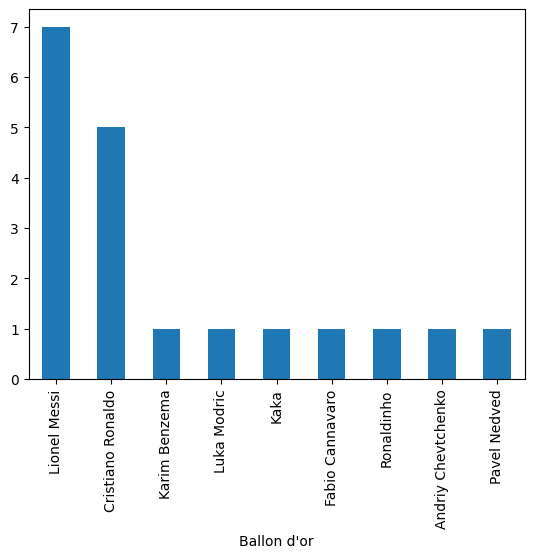

In [9]:
df["Ballon d'or"].value_counts().plot(kind='bar')

Commençons à présent l'étude. La première chose à faire semble être d'observer les moyennes de buts et de passes décisives par saison, puisque cela apparaît souvent être un facteur déterminant pour le ballon d'or.

In [10]:
df.describe()

,Numero sur le terrain,Nombre de buts,Nombre de passes decisives,Nombre de points pour le ballon d'or
count,19.000000,19.000000,19.000000,19.000000
mean,10.473684,43.631579,15.947368,555.947368
std,5.872425,21.069226,8.573044,234.624398
min,5.000000,4.000000,0.000000,173.000000
25%,7.000000,27.000000,12.500000,445.000000
50%,10.000000,49.000000,16.000000,607.000000
75%,10.000000,57.000000,17.500000,749.000000
max,30.000000,85.000000,32.000000,946.000000


Avec plus de 43 buts en moyenne par saison pour les lauréats, marquer des buts semble donc en effet déterminant pour avoir le ballon d'or. De même, les vainqueurs réalisent près de 16 passes décisives par saison en moyenne, ce qui est bien au-dessus de la moyenne globale des joueurs tout championnat confondu. Mais est-ce une condition nécessaire pour gagner le ballon d'or ? Un joueur l'a gagné en ne marquant que 4 buts dans l'année...

In [11]:
df[df["Nombre de buts"]==4]

,Ballon d'or,Nationalite,Club,Poste,Numero sur le terrain,Nombre de trophees durant la saison,Nombre de buts,Nombre de passes decisives,Nombre de points pour le ballon d'or,Ligue des champions
Annee,,,,,,,,,,
2006,Fabio Cannavaro,Italie,Real Madrid,Defenseur,5,1,4,0,173,Quart de finale


Ce joueur, c'est Cannavaro, vainqueur de la coupe du monde en 2006, et jouant au poste de défenseur. Le ballon d'or ne revient donc pas uniquement à des attaquants qui marquent des dizaines et des dizaines de buts par saison. On a aussi vu sur un tableau précédent qu'il y avait un écart-type important. Cherchons les joueurs qui ont déjà marqué plus de 50 buts en une année.

In [12]:
df[df["Nombre de buts"]>50]

,Ballon d'or,Nationalite,Club,Poste,Numero sur le terrain,Nombre de trophees durant la saison,Nombre de buts,Nombre de passes decisives,Nombre de points pour le ballon d'or,Ligue des champions
Annee,,,,,,,,,,
2019,Lionel Messi,Argentine,FC Barcelone,Attaquant,10,3,56,21,686,Demi-finale
2017,Cristiano Ronaldo,Portugal,Real Madrid,Attaquant,7,4,54,13,946,Vainqueur
2016,Cristiano Ronaldo,Portugal,Real Madrid,Attaquant,7,3,57,17,745,Vainqueur
2015,Lionel Messi,Argentine,FC Barcelone,Attaquant,10,4,62,30,766,Vainqueur
2014,Cristiano Ronaldo,Portugal,Real Madrid,Attaquant,7,3,62,17,801,Vainqueur
2013,Cristiano Ronaldo,Portugal,Real Madrid,Attaquant,7,2,59,14,672,Demi-finale
2012,Lionel Messi,Argentine,FC Barcelone,Attaquant,10,3,85,31,790,Demi-finale
2011,Lionel Messi,Argentine,FC Barcelone,Attaquant,10,5,57,32,607,Vainqueur


On constate donc que si la moyenne de buts pour les lauréats est si haute (42 buts par année), c'est essentiellement à cause de Cristiano Ronaldo et de Lionel Messi, qui ont produit 8 saisons à plus de 50 buts ! (dont une avec 85 buts qui est simplement phénoménale). Remarquons aussi tout de même que la majorité des lauréats sont tout de même des attaquants, ce qui semble indiquer qu'il est préférable d'être attaquant et de marquer pour gagner le ballon d'or : 

In [13]:
print("Parmi les 19 vainqueurs considérés, il y en a",df[df["Poste"].str.contains("Attaquant")].shape[0],"qui sont des attaquants.")

Parmi les 19 vainqueurs considérés, il y en a 14 qui sont des attaquants.


In [14]:
df[df["Nombre de passes decisives"]>20]

,Ballon d'or,Nationalite,Club,Poste,Numero sur le terrain,Nombre de trophees durant la saison,Nombre de buts,Nombre de passes decisives,Nombre de points pour le ballon d'or,Ligue des champions
Annee,,,,,,,,,,
2019,Lionel Messi,Argentine,FC Barcelone,Attaquant,10,3,56,21,686,Demi-finale
2015,Lionel Messi,Argentine,FC Barcelone,Attaquant,10,4,62,30,766,Vainqueur
2012,Lionel Messi,Argentine,FC Barcelone,Attaquant,10,3,85,31,790,Demi-finale
2011,Lionel Messi,Argentine,FC Barcelone,Attaquant,10,5,57,32,607,Vainqueur


Quant aux passes décisives, c'est principalement Lionel Messi qui augmente la moyenne, puisqu'il est le seul à en réaliser plus de 20 en une année, et cela à 4 reprises.

Une autre donnée qui peut sembler intéressante est le nombre de points pour le ballon d'or. En réalité, cela n'est pas représentatif car le nombre de votants et le nombre de points à attribuer a changé entre 2003 et 2022, ce qui explique les fortes disparités. On constate néanmoins que celui qui a remporté le plus de points en une année est Cristiano Ronaldo en 2017, une année pendant laquelle il a des statistiques qui ne sont pas plus extraordinaires que les autres en termes de buts et passes décisives.

In [15]:
df[df["Nombre de points pour le ballon d'or"]==946]

,Ballon d'or,Nationalite,Club,Poste,Numero sur le terrain,Nombre de trophees durant la saison,Nombre de buts,Nombre de passes decisives,Nombre de points pour le ballon d'or,Ligue des champions
Annee,,,,,,,,,,
2017,Cristiano Ronaldo,Portugal,Real Madrid,Attaquant,7,4,54,13,946,Vainqueur


Passons à un nouveau point. Mis à part les buts et passes décisives, ce qui paraît essentiel est le nombre de trophées gagnés. Personne ne remporte le ballon d'or sans remporter un moins un trophée majeur : 

In [16]:
df["Nombre de trophees durant la saison"].isnull().sum()

0

Il est souvent considéré que la ligue des champions est le trophée le plus important à gagner en club. Voyons où sont arrivés les lauréats dans la compétition chaque année : 

In [17]:
group=df.groupby("Ligue des champions")

In [18]:
print(
    "Parmi les lauréats,",group.get_group("Vainqueur").shape[0],
    "ont remporté la ligue des champions l'année où ils ont eu le ballon d'or.",
    group.get_group("Finale").shape[0],"est arrivé en finale et",
    group.get_group("Demi-finale").shape[0],"sont arrivés en demi-finale."
)

Parmi les lauréats, 10 ont remporté la ligue des champions l'année où ils ont eu le ballon d'or. 1 est arrivé en finale et 4 sont arrivés en demi-finale.


On voit donc que la ligue des champions est en effet déterminante dans l'attribution du trophée. Les lauréats ont souvent remporté la ligue des champions, ou sont au moins allé loin dans la compétition avec leur équipe. On constate d'ailleurs qu'ils arrivent tous au moins en huitième de finale, puisqu'aucun n'est éliminé en phase de groupe : 

In [19]:
df[df["Ligue des champions"].str.contains("Phase de groupe")].shape[0]

0

On aurait pu ajouter la coupe du monde comme trophée à étudier dans nos statistiques puisqu'elle est également essentielle dans l'année d'un joueur. Mais comme elle n'a lieu que tous les 4 ans, j'ai préféré la laisser de côté puisqu'elle n'est déterminante pour le ballon d'or qu'une année sur 4.

Pour conclure cette étude, on a vu qu'évidemment les buts et passes décisives étaient importantes pour remporter le ballon d'or. Cependant ce n'est peut-être pas le point le plus déterminant puisque certains milieux de terrain ou même défenseur (dont le but principal n'est pas de marquer) ont remporté le ballon d'or. Ainsi, c'est sûrement plutôt les trophées gagnés durant la saison (principalement la ligue des champions qui a lieu chaque année), combinés aux performances du joueur à son propre poste, qui permettent à un joueur de pouvoir prétendre au ballon d'or. Puisque Ronaldo et Messi dominent à chaque fois toutes les statistiques, on voit bien qu'ils ont régné sur le monde du football et qu'ils méritent leurs multiples nominations au ballon d'or. Peut-être (et c'est même presque certain) que les années à venir vont avoir tendance à faire baisser les moyennes que l'on a vues ici, ce qui va nous rappeler à quel point nous avons eu de la chance de voir des joueurs comme Ronaldo ou Messi jouer.